# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
metrics2016 = pd.read_excel('../data/Metrics_0.xlsm', sheet_name='Metrics')
metrics2016.head()

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,HR,...,NaN,347091534,NaN,No,NaN,NaN,NaN,Hide questionable data tags,NaN,NaN
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,MB,...,NaN,86863364,NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
2,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,DR,...,NaN,48814480,NaN,No,NaN,2.0,NaN,1,NaN,2.0
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,CB,...,NaN,9214967,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,RB,...,NaN,2988560,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
metrics2016.columns

Index([                                                                   'Name',
                                                                          'City',
                                                                         'State',
                                                                 'Legacy NTD ID',
                                                                        'NTD ID',
                                                             'Organization Type',
                                                                 'Reporter Type',
                                                      'Primary UZA\n Population',
                                                                   'Agency VOMS',
                                                                          'Mode',
                                                                           'TOS',
                                                                     'Mode VOMS',
                

In [19]:
# Clean column names
metrics2016.columns = [c.replace('\n', '') if isinstance(c, str) else c for c in metrics2016.columns]

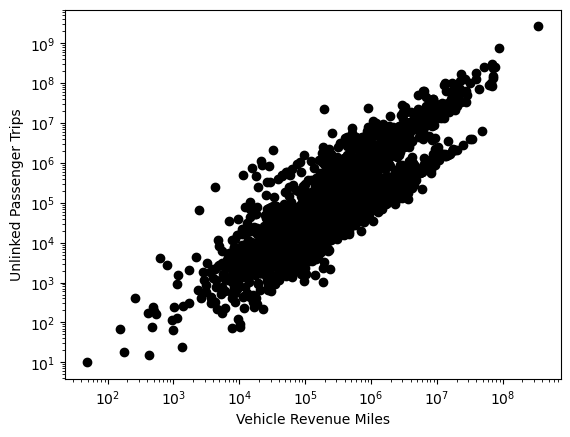

In [7]:
fig, ax = plt.subplots()
xcol = 'Vehicle Revenue Miles'
ycol = 'Unlinked Passenger Trips'
ax.plot(metrics2016[xcol], metrics2016[ycol], 'ko')
ax.set_xlabel(xcol)
ax.set_ylabel(ycol)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [22]:
cutdf = metrics2016[metrics2016['Reporter Type'] == 'Full Reporter'].copy()
grouped = cutdf.groupby(['NTD ID', 'Name', 'City', 'State', 'Primary UZA Population'])
features = ['Unlinked Passenger Trips', 'Vehicle Revenue Miles']
merged = grouped[features].sum().reset_index().set_index('NTD ID')
merged

,Name,City,State,Primary UZA Population,Unlinked Passenger Trips,Vehicle Revenue Miles
NTD ID,,,,,,
1,King County Department of Transportation,Seattle,WA,3059393,127384761,61048893
2,Spokane Transit Authority,Spokane,WA,387847,10922108,9051663
3,Pierce County Transportation Benefit Area Auth...,Tacoma,WA,3059393,9764786,11507009
5,Everett Transit,Everett,WA,3059393,2067142,1803134
6,Yakima Transit,Yakima,WA,129534,1185587,1605243
...,...,...,...,...,...,...
90244,City of Tulare,Tulare,CA,219454,383345,654756
90296,Claremont Dial-a-Ride,La Verne,CA,12150996,46777,71946
91092,Tahoe Transportation District,Zephyr Cove,NV,210000,808593,798879


In [24]:
merged['UPT Per Capita'] = merged['Unlinked Passenger Trips'] / merged['Primary UZA Population']
merged['VRM Per Capita'] = merged['Vehicle Revenue Miles'] / merged['Primary UZA Population']

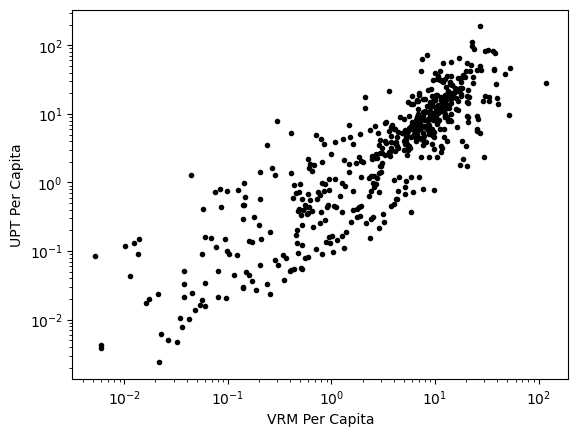

In [26]:
fig, ax = plt.subplots()
xcol = 'VRM Per Capita'
ycol = 'UPT Per Capita'
ax.plot(merged[xcol], merged[ycol], 'k.')
ax.set_xlabel(xcol)
ax.set_ylabel(ycol)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

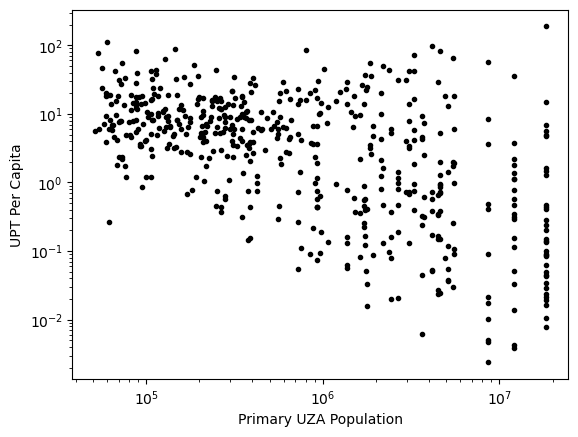

In [27]:
fig, ax = plt.subplots()
xcol = 'Primary UZA Population'
ycol = 'UPT Per Capita'
ax.plot(merged[xcol], merged[ycol], 'k.')
ax.set_xlabel(xcol)
ax.set_ylabel(ycol)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()